# Instantaneous rate averaging - Adaptive fast

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm

%matplotlib widget

## Settings

In [9]:
confint_percentage = 0.95
confint_stddev_low, confint_stddev_high = norm.interval(confint_percentage)

confint_percentage_half = (1 - confint_percentage) / 2
confint_percentile_low = confint_percentage_half
confint_percentile_high = 1 - confint_percentage_half

## Adaptive fast

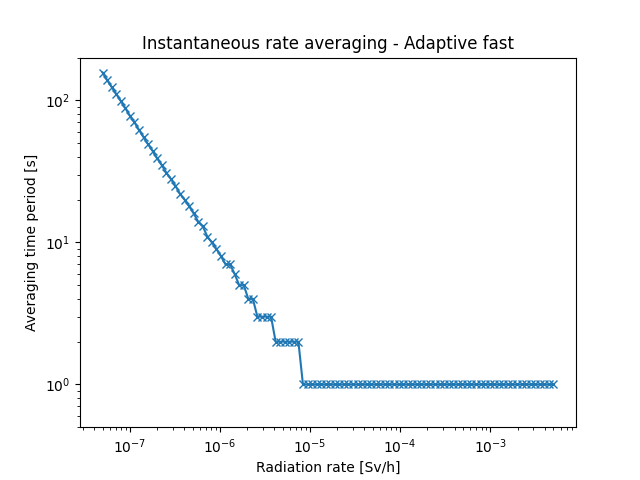

In [10]:
averaging_time_constant = 20
averaging_period_time_min = 5
averaging_period_time_max = 300

sv_h_min = 0.05E-6

conversion_factor = 153.8   # J305
#conversion_factor = 60.0   # J614

cps_to_svh = 60 * 1E-6 / conversion_factor

svh = sv_h_min * np.logspace(0, 5, 100)
cps = svh / cps_to_svh

avg_time = []
for svh_value in svh:
    cps_value = svh_value / cps_to_svh

    avg_time_value = averaging_time_constant / cps_value

    avg_time_value = np.ceil(avg_time_value)

    avg_time.append(avg_time_value)

plt.figure()
plt.title('Instantaneous rate averaging - Adaptive fast')
plt.xlabel('Radiation rate [Sv/h]')
plt.ylabel('Averaging time period [s]')
plt.loglog(svh, avg_time, marker='x')
plt.ylim([0.5, 200])
plt.show()

## Confidence intervals

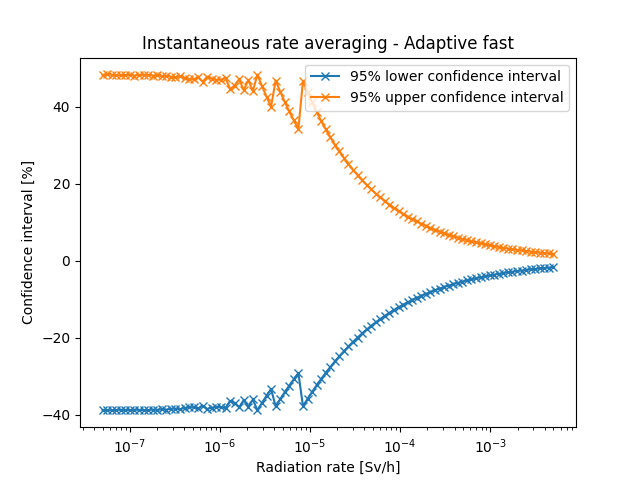

In [11]:
n = cps * avg_time

n_low = 0.5 * chi2.ppf(confint_percentile_low, df=2 * n)
n_high = 0.5 * chi2.ppf(confint_percentile_high, df=2 * n)

confint_low = (n_low - n) / n
confint_high = (n_high - n) / n

plt.figure()
plt.title('Instantaneous rate averaging - Adaptive fast')
plt.xlabel('Radiation rate [Sv/h]')
plt.ylabel('Confidence interval [%]')
c1, = plt.semilogx(svh, 100 * confint_low, marker='x', label='95% lower confidence interval')
c2, = plt.semilogx(svh, 100 * confint_high, marker='x', label='95% upper confidence interval')
plt.legend(handles=[c1, c2], loc='upper right')
plt.show()